In [0]:
#!pip install tensorflow-gpu

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
## import the data from the quandl
#!pip install quandl
import quandl

In [0]:
quandl.ApiConfig.api_key = 'zuiQMfguw3rRgLvkCzxk'

In [0]:
df = quandl.get('WIKI/GOOGL')

In [6]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [7]:
df.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,1092.57,1108.70,1087.21,1094.00,1990515.0,0.0,1.0,1092.57,1108.70,1087.21,1094.00,1990515.0
2018-03-22,1080.01,1083.92,1049.64,1053.15,3418154.0,0.0,1.0,1080.01,1083.92,1049.64,1053.15,3418154.0
2018-03-23,1051.37,1066.78,1024.87,1026.55,2413517.0,0.0,1.0,1051.37,1066.78,1024.87,1026.55,2413517.0
2018-03-26,1050.60,1059.27,1010.58,1054.09,3272409.0,0.0,1.0,1050.60,1059.27,1010.58,1054.09,3272409.0
2018-03-27,1063.90,1064.54,997.62,1006.94,2940957.0,0.0,1.0,1063.90,1064.54,997.62,1006.94,2940957.0


In [8]:
##checking is there null value
df.isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

In [9]:
df.corr()[['Adj. Close']]

,Adj. Close
Open,0.815542
High,0.815432
Low,0.815961
Close,0.816047
Volume,-0.550264
Ex-Dividend,0.010773
Split Ratio,NaN
Adj. Open,0.999758
Adj. High,0.999869
Adj. Low,0.999902


In [0]:
## dropping the split ratio adj.Vlume Volume EX-Divident
df=df.drop('Volume',axis=1)

In [0]:
df=df.drop('Adj. Volume',axis=1)
df=df.drop('Split Ratio',axis=1)
df=df.drop('Ex-Dividend',axis=1)

In [12]:
df.head()

,Open,High,Low,Close,Adj. Open,Adj. High,Adj. Low,Adj. Close
Date,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,50.159839,52.191109,48.128568,50.322842
2004-08-20,101.01,109.08,100.50,108.310,50.661387,54.708881,50.405597,54.322689
2004-08-23,110.76,113.48,109.05,109.400,55.551482,56.915693,54.693835,54.869377
2004-08-24,111.24,111.60,103.57,104.870,55.792225,55.972783,51.945350,52.597363
2004-08-25,104.76,108.00,103.88,106.000,52.542193,54.167209,52.100830,53.164113


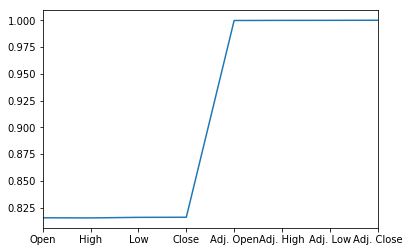

In [13]:
df.corr()['Adj. Close'].plot()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [0]:
X = df.drop('Adj. Close',axis=True)
y = df[['Adj. Close']]

In [0]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2)
result = y_test
scaler = MinMaxScaler()
scaler.fit(x_train)
xtrain_t = scaler.transform(x_train)
scaler.fit(x_test)
xtest_t = scaler.transform(x_test)
scaler.fit(y_train)
y_train =scaler.transform(y_train) # we transform the y so after predict we have to inverse transeform it
scaler.fit(y_test)
y_test =scaler.transform(y_test) # we transform the y so after predict we have to inverse transeform it

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten

Using TensorFlow backend.


In [0]:
x_train = np.reshape(xtrain_t, (xtrain_t.shape[0],xtrain_t.shape[1],1))
x_test = np.reshape(xtest_t, (xtest_t.shape[0],xtest_t.shape[1],1))

In [19]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(2739, 7, 1)
(685, 7, 1)
(2739, 1)
(685, 1)


In [0]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True))

In [0]:
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))



In [0]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(Dense(units = 1))

In [24]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [25]:
regressor.fit(x_train,y_train,epochs = 100)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
2739/2739 [==============================] - 5s 2ms/step - loss: 0.0283 - acc: 7.3019e-04
Epoch 2/100
2739/2739 [==============================] - 3s 1ms/step - loss: 0.0108 - acc: 7.3019e-04
Epoch 3/100
2739/2739 [==============================] - 3s 1ms/step - loss: 0.0074 - acc: 7.3019e-04
Epoch 4/100
2739/2739 [==============================] - 3s 1ms/step - loss: 0.0036 - acc: 7.3019e-04
Epoch 5/100
2739/2739 [==============================] - 3s 1ms/step - loss: 0.0023 - acc: 7.3019e-04
Epoch 6/100
2739/2739 [==============================] - 3s 1ms/step - loss: 0.0022 - acc: 7.3019e-04
Epoch 7/100
2739/2739 [==============================] - 3s 1ms/step - loss: 0.0020 - acc: 7.3019e-04
Epoch 8/100
2739/2739 [==============================] - 3s 1ms/step - loss: 0.0015 - acc: 7.3019e-04
Epoch 9/100
2739/2739

In [0]:
y_pred = regressor.predict(x_test)

In [0]:
output = scaler.inverse_transform(y_pred)

In [0]:
real_output = []
for item in output:
  real_output.append((item[0]))

In [0]:
actual_output = []
for item in result['Adj. Close']:
  actual_output.append((item))

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
mse = mean_squared_error(actual_output,real_output)

In [44]:
mse

81.42894005966636

In [45]:
result['predited value'] = np.array(real_output)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
result

,Adj. Close,predited value
Date,,
2013-05-30,436.728138,428.708923
2011-12-29,322.194584,315.425232
2006-12-29,230.952930,229.817062
2016-04-07,760.120000,751.827332
2013-12-12,536.636546,529.710571
2011-05-04,268.724527,265.116699
2015-06-18,556.180000,540.505371
2015-04-14,539.780000,530.906616
2005-10-27,177.076619,179.123184


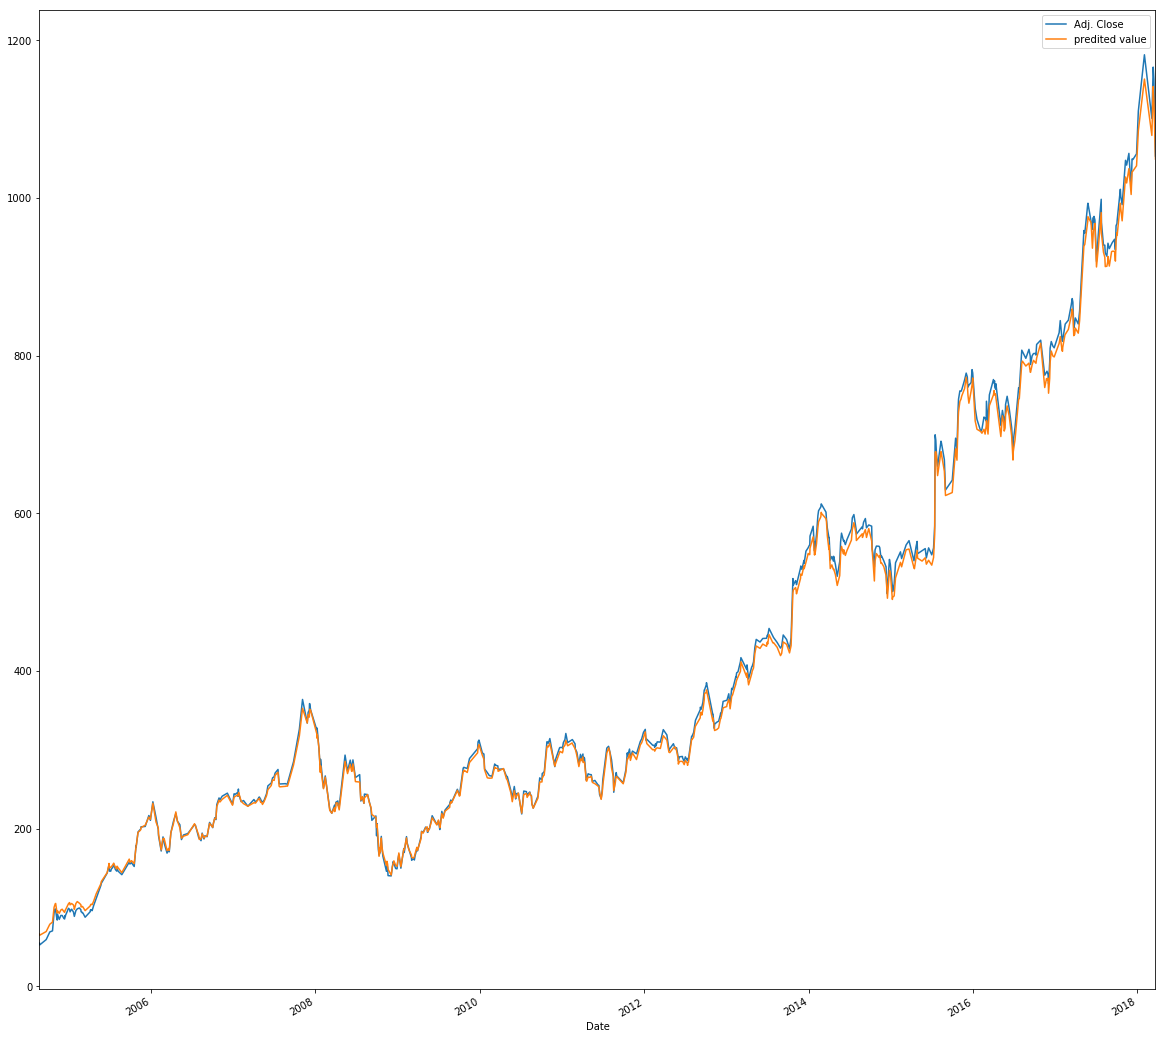

In [52]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)
result.plot()